[*********************100%***********************]  10 of 10 completed



--- Pairs sorted by Correlation (highest to lowest) ---
AAPL - MSFT | Correlation: 0.9717 | Cointegration p-value: 0.3672
GOOGL - ACN | Correlation: 0.9677 | Cointegration p-value: 0.0021
MSFT - ACN | Correlation: 0.9494 | Cointegration p-value: 0.1843
GOOGL - MSFT | Correlation: 0.9418 | Cointegration p-value: 0.4897
AAPL - ACN | Correlation: 0.9318 | Cointegration p-value: 0.2295
TSLA - ACN | Correlation: 0.9225 | Cointegration p-value: 0.1577
TSLA - GOOGL | Correlation: 0.9137 | Cointegration p-value: 0.1312
MSFT - ORCL | Correlation: 0.9098 | Cointegration p-value: 0.2166
MSFT - NOW | Correlation: 0.9067 | Cointegration p-value: 0.4161
GOOGL - NOW | Correlation: 0.9038 | Cointegration p-value: 0.2889
AAPL - GOOGL | Correlation: 0.9031 | Cointegration p-value: 0.5168
TSLA - AAPL | Correlation: 0.8982 | Cointegration p-value: 0.4837
ACN - NOW | Correlation: 0.8965 | Cointegration p-value: 0.2863
AMZN - CRM | Correlation: 0.8763 | Cointegration p-value: 0.0661
TSLA - MSFT | Correlati

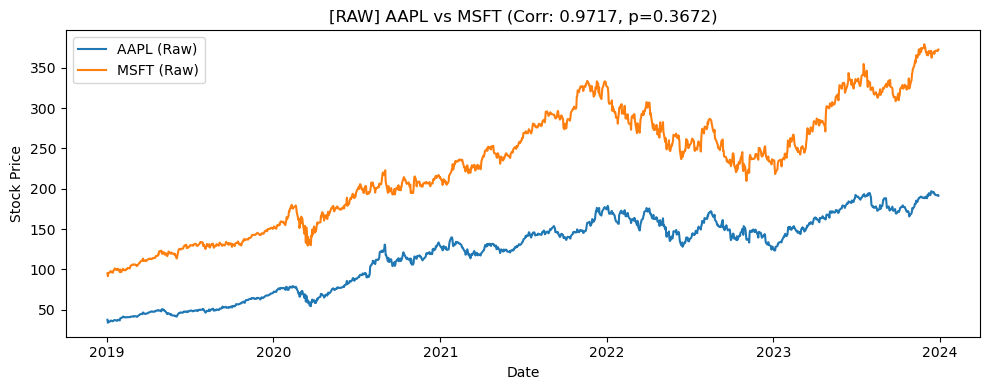

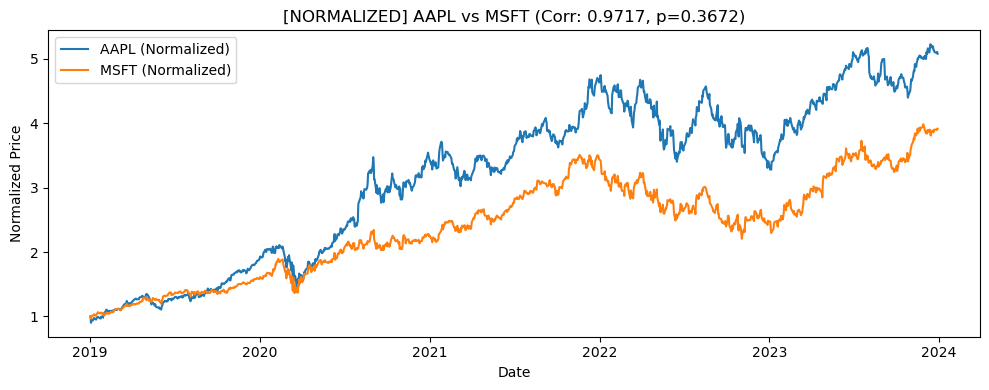

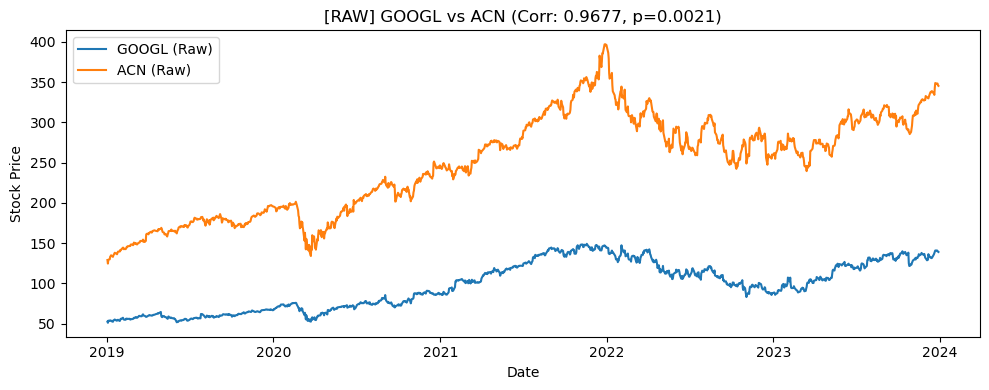

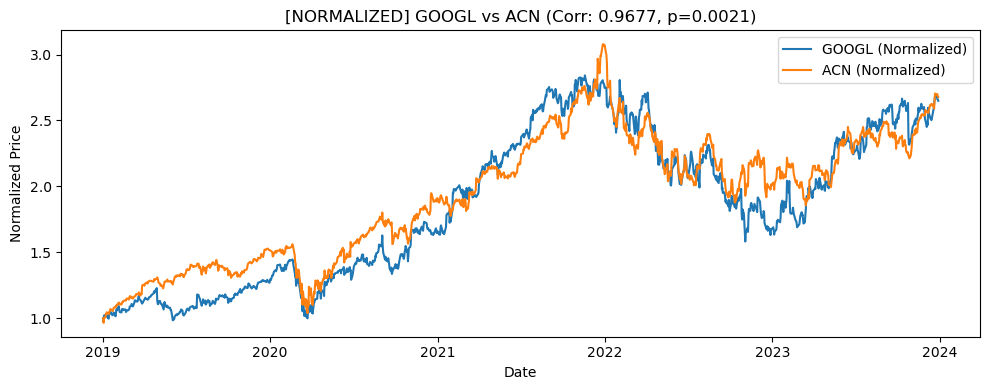

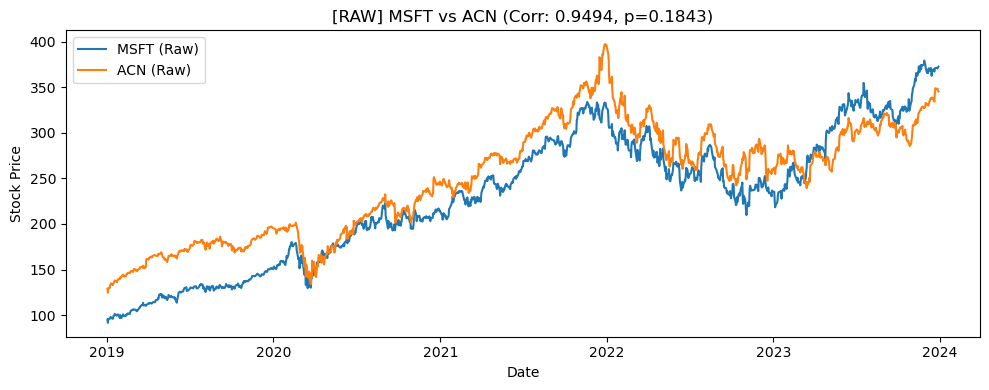

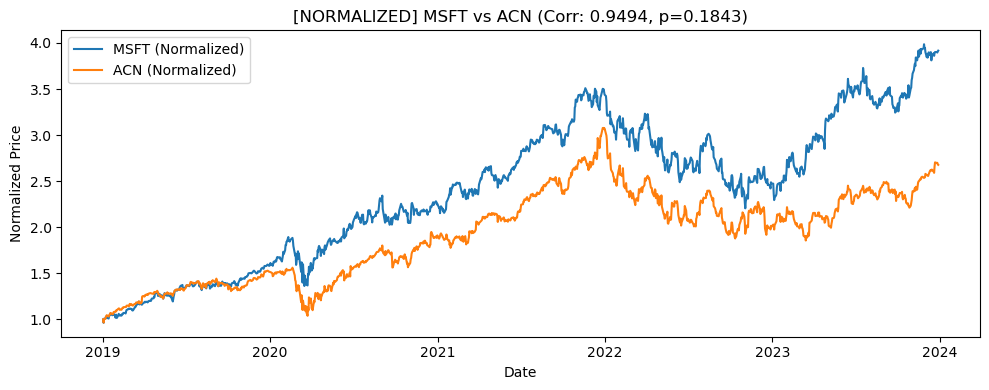

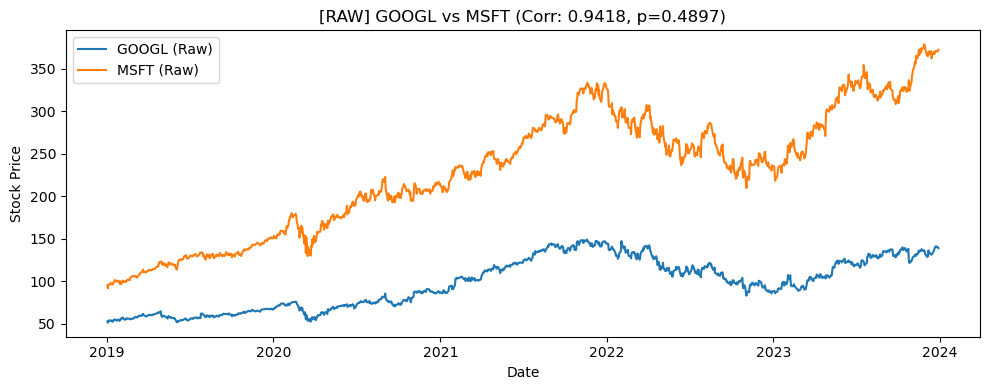

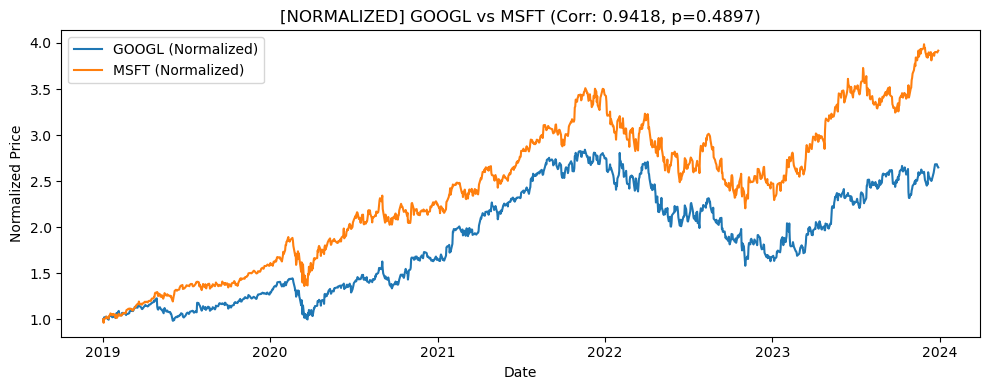

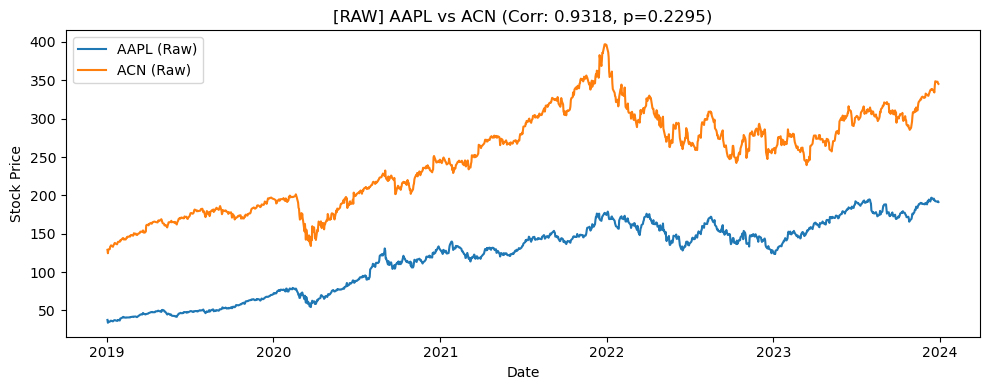

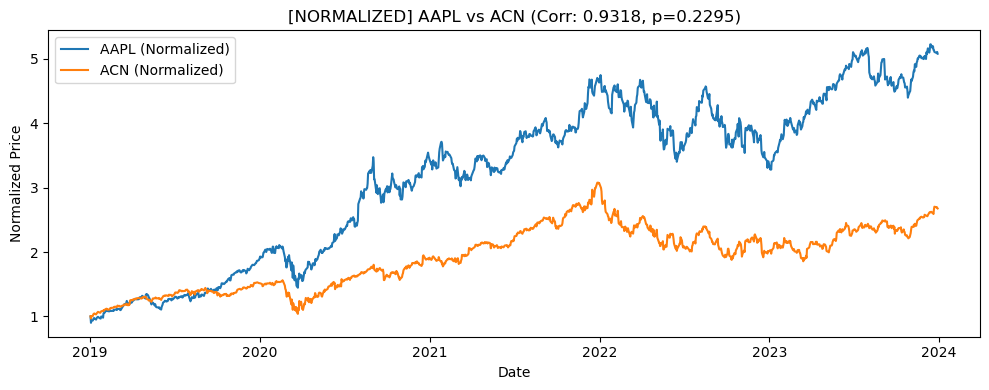

Normalized Prices of GOOGL and ACN:

            GOOGL (Normalized)  ACN (Normalized)
Date                                            
2019-01-02            1.000000          1.000000
2019-01-03            0.972304          0.965858
2019-01-04            1.022177          1.003414
2019-01-07            1.020139          1.006899
2019-01-08            1.029099          1.032364


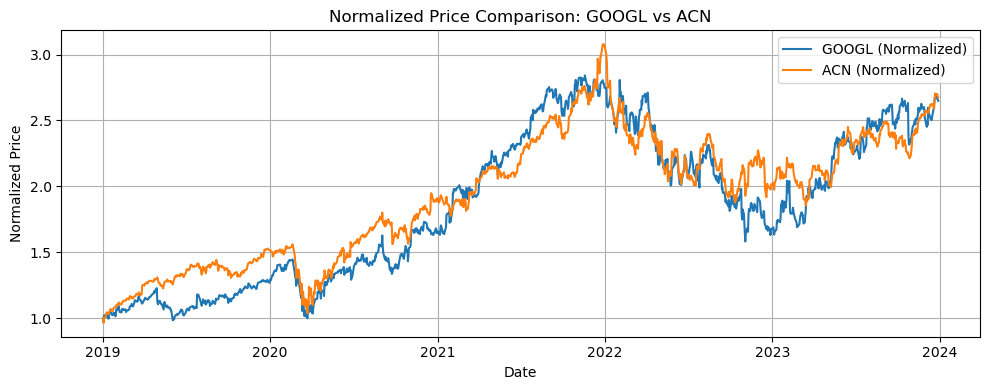

Choosing GOOGL - ACN as the pair


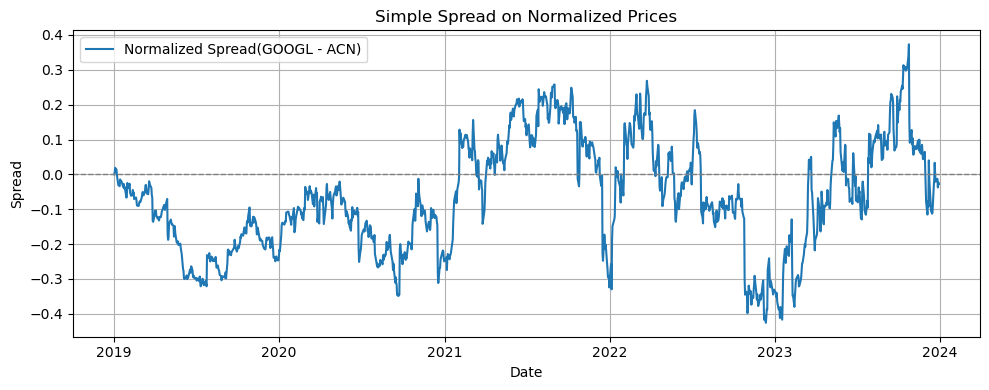

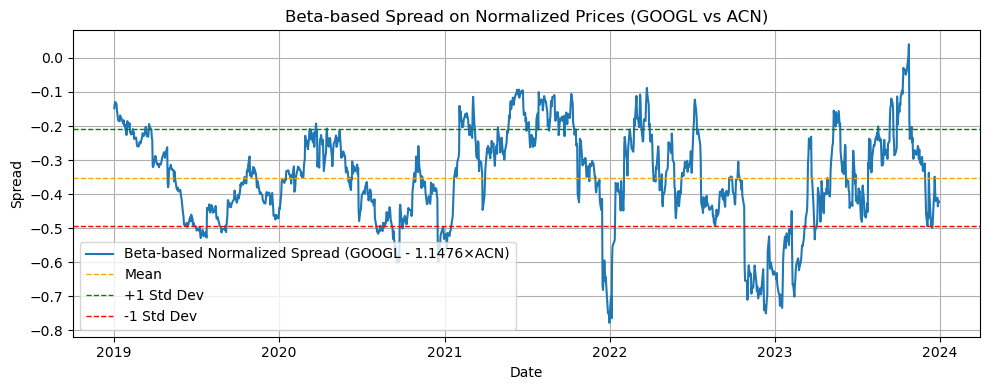

Beta Coefficient (Normalized): 1.1476


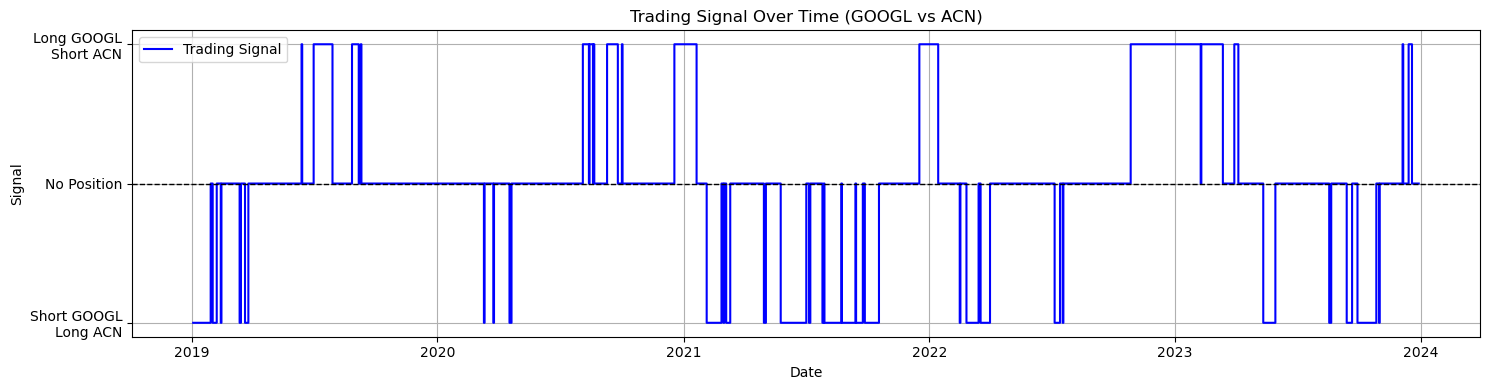

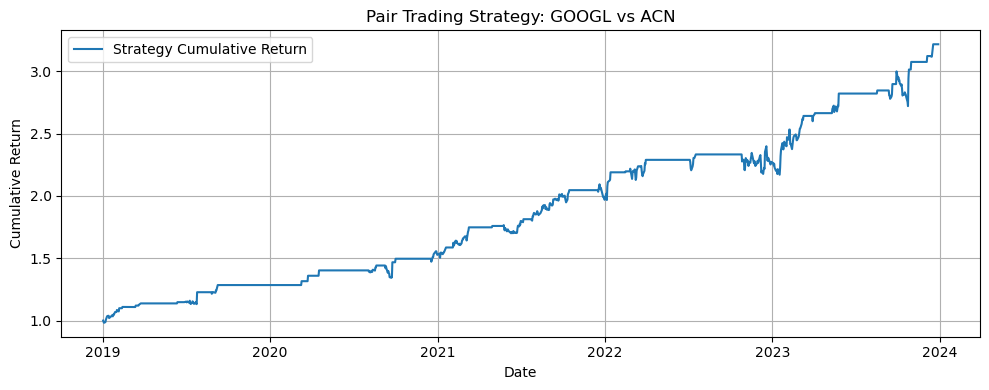

[*********************100%***********************]  1 of 1 completed


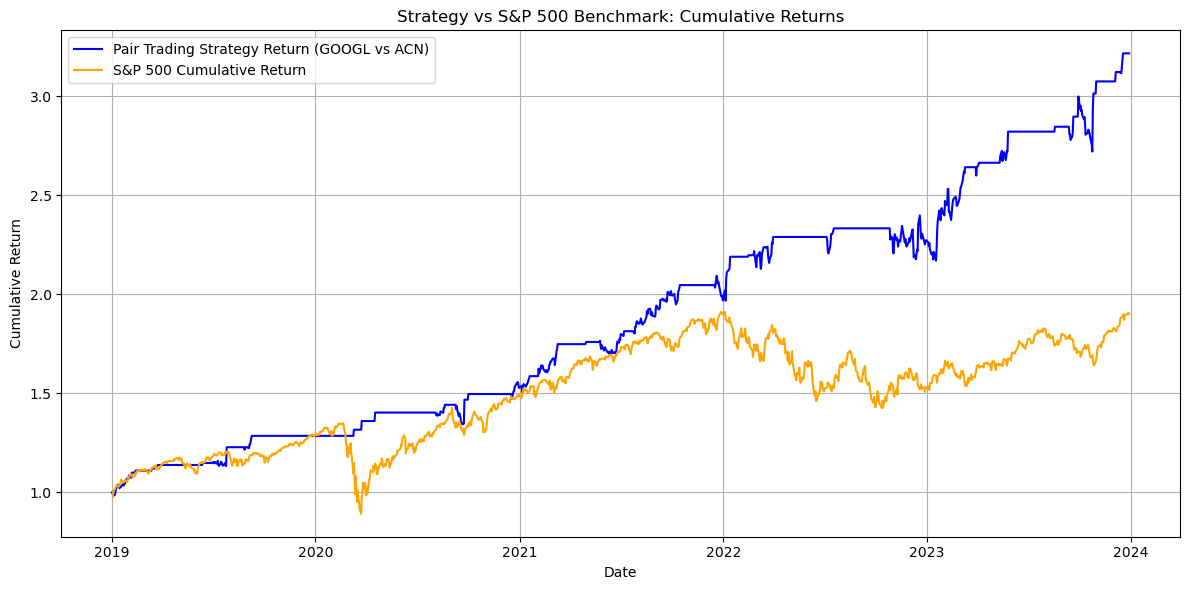


--- Strategy Performance Metrics ---
Sharpe Ratio: 1.7559
Max Drawdown: -9.54%
Volatility (Annualized): 0.1389
Alpha (Annualized): 0.2420
Beta vs S|&P 500: 0.0123
Strategy Cumulative Return: 3.22x
S&P 500 Cumulative Return: 1.90x
Profit Factor: 1.7675


In [22]:
import yfinance as yf    # yfinance : python library of yahoo finance 
import pandas as pd      
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from itertools import combinations    # combinations : function inside itertools module
from statsmodels.tsa.stattools import coint      # coint : for checking co integration
from sklearn.linear_model import LinearRegression         # finding the best fitting line between two sets of data after considering one to be dependant on the other 

"""" Considering 10 stocks from the US IT sector """
tickers=['TSLA', 'AMZN', 'AAPL', 'GOOGL', 'MSFT', 'ORCL', 'CRM', 'IBM', 'ACN', 'NOW'] 

data=yf.download(tickers,start='2019-01-01',end='2023-12-31')['Close']    # downloads the data for the specified dates for the tickers I have specified
data.dropna(inplace=True)           # to not consider the missing days (NaN)
pairs=list(combinations(tickers, 2))     

coresults=[]

for i,j in pairs:
    series1=data[i]
    series2=data[j]
    corr=series1.corr(series2)         # this is using pearson correlation
    score,pvalue, _ =coint(series1,series2)   # this is the cointegration test

    # Append results
    coresults.append((i, j, corr, pvalue))

    # Sort by correlation (highest to lowest)
coresults_sorted_by_corr = sorted(coresults, key=lambda x: x[2], reverse=True)

# Print all sorted by correlation
print("\n--- Pairs sorted by Correlation (highest to lowest) ---")
for stock1, stock2, corr, pval in coresults_sorted_by_corr:
    print(f"{stock1} - {stock2} | Correlation: {corr:.4f} | Cointegration p-value: {pval:.4f}")
# plotting only the top 5 correlated pairs
# BEFORE normalization
top5=coresults_sorted_by_corr[:5]
for stock1, stock2, corr, pval in top5:
    plt.figure(figsize=(10,4))
    plt.plot(data[stock1],label=f"{stock1} (Raw)")      
    plt.plot(data[stock2],label=f"{stock2} (Raw)")      
    plt.title(f"[RAW] {stock1} vs {stock2} (Corr: {corr:.4f}, p={pval:.4f})")       # 4f : to print 4 decimals 
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Normalize by first value
    norm1=data[stock1]/data[stock1].iloc[0]
    norm2=data[stock2]/data[stock2].iloc[0]

# AFTER normalization
    plt.figure(figsize=(10,4))
    plt.plot(norm1,label=f"{stock1} (Normalized)")
    plt.plot(norm2,label=f"{stock2} (Normalized)")
    plt.title(f"[NORMALIZED] {stock1} vs {stock2} (Corr: {corr:.4f}, p={pval:.4f})")
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.tight_layout()
    plt.show()

# printing ONLY NORMALISED GOOGL and ACN 
googl_norm=data['GOOGL']/data['GOOGL'].iloc[0]
acn_norm=data['ACN']/data['ACN'].iloc[0]
normalized_df=pd.DataFrame({'GOOGL (Normalized)':googl_norm,'ACN (Normalized)':acn_norm})
print("Normalized Prices of GOOGL and ACN:\n")
print(normalized_df.head())
plt.figure(figsize=(10,4))
plt.plot(normalized_df['GOOGL (Normalized)'], label='GOOGL (Normalized)')
plt.plot(normalized_df['ACN (Normalized)'], label='ACN (Normalized)')
plt.title("Normalized Price Comparison: GOOGL vs ACN")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Choosing GOOGL - ACN as the pair")

# plotting SIMPLE SPREAD on NORMALIZED data
spread_norm_simple = googl_norm - acn_norm     
plt.figure(figsize=(10,4))
plt.plot(spread_norm_simple, label="Normalized Spread(GOOGL - ACN)")
plt.axhline(0, color='gray',linestyle='--',linewidth=1)
plt.title("Simple Spread on Normalized Prices")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# finding BETA-BASED SPREAD on NORMALIZED data
X=acn_norm.values.reshape(-1, 1)
y=googl_norm.values
reg=LinearRegression().fit(X, y)
beta=reg.coef_[0]
spread = googl_norm - beta * acn_norm
std_spread = spread.std()      #finding standard deviation of spread

# plotting BETA-BASED SPREAD on NORMALIZED data
plt.figure(figsize=(10, 4))
plt.plot(spread, label=f"Beta-based Normalized Spread (GOOGL - {beta:.4f}×ACN)")
plt.axhline(spread.mean(),color='orange',linestyle='--',linewidth=1,label='Mean')
plt.axhline(spread.mean()+std_spread, color='green', linestyle='--', linewidth=1, label='+1 Std Dev')
plt.axhline(spread.mean()-std_spread, color='red', linestyle='--', linewidth=1, label='-1 Std Dev')
plt.title("Beta-based Spread on Normalized Prices (GOOGL vs ACN)")
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Beta Coefficient (Normalized): {beta:.4f}")

# finding mean spread and the std dev +1 and std dev -1 lines to plot on graph for some reference
mean_spread=spread.mean()
signal=pd.Series(0, index=spread.index)      # signal to decide when to bet 
signal[spread > mean_spread + std_spread]=-1  # in this case short(sell) GOOGL, long(buy) ACN as google price is predicted to come back down and acn is predicted to come back up
signal[spread < mean_spread - std_spread]=1   # in this case long(buy) GOOGL, short(sell) ACN as vice versa of above happens
signal=signal.shift(1)     # because we see the day before's data to determine what to do 

plt.figure(figsize=(15,4))
plt.plot(signal.index,signal,label='Trading Signal',color='blue',drawstyle='steps-post')
plt.axhline(0,color='black',linestyle='--',linewidth=1)
plt.title("Trading Signal Over Time (GOOGL vs ACN)")
plt.xlabel("Date")
plt.ylabel("Signal")
plt.yticks([-1, 0, 1],['Short GOOGL\nLong ACN','No Position','Long GOOGL\nShort ACN'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# calculating returns 
returns=googl_norm.pct_change() - beta * acn_norm.pct_change()
strategy_returns=signal*returns
cumulative_return=(1+strategy_returns.fillna(0)).cumprod()
sharpe_ratio = strategy_returns.mean()/strategy_returns.std()*np.sqrt(252)
rolling_max=cumulative_return.cummax()
drawdown=cumulative_return/rolling_max - 1
max_drawdown=drawdown.min()

plt.figure(figsize=(10,4))
plt.plot(cumulative_return,label="Strategy Cumulative Return")
plt.title("Pair Trading Strategy: GOOGL vs ACN")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# adding a benchmark of S&P 500
benchmark=yf.download('^GSPC', start='2019-01-01', end='2023-12-31')['Close']
benchmark=benchmark.loc[signal.index]  # Align dates with strategy
benchmark_norm = benchmark/benchmark.iloc[0]  # Normalize
benchmark_cum_return = (1+benchmark_norm.pct_change().fillna(0)).cumprod()
# dropping missing data
returns=returns.dropna()
benchmark_cum_return = benchmark_cum_return.loc[returns.index]

# plotting my strategy vs the benchmark which is S&P 500
plt.figure(figsize=(12, 6))
plt.plot(cumulative_return, label='Pair Trading Strategy Return (GOOGL vs ACN)', color='blue')
plt.plot(benchmark_cum_return, label='S&P 500 Cumulative Return', color='orange')
plt.title("Strategy vs S&P 500 Benchmark: Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# finding volatility
# Daily standard deviation, annualized by sqrt(252)
volatility = strategy_returns.std()*np.sqrt(252)

# finding alpha and beta
# ensuring benchmark and strategy returns are 1D
strategy_1d = strategy_returns.squeeze()
benchmark_1d = benchmark_returns.squeeze()

# combining into a DataFrame, drop NaNs to align both
returns_df = pd.DataFrame({'strategy': strategy_1d,'benchmark': benchmark_1d}).dropna()

# X: benchmark returns(S&P 500),y:strategy returns
X_benchmark=returns_df['benchmark'].values.reshape(-1, 1)  # 2D for sklearn
y_strategy=returns_df['strategy'].values.ravel()           # 1D target

# running regression: strategy ~alpha+beta×benchmark
reg_market=LinearRegression().fit(X_benchmark,y_strategy)

# annualized alpha: intercept × 252 trading days
alpha=reg_market.intercept_ *252

# Beta of strategy relative to market
beta_strategy = reg_market.coef_[0]

# printing all results
print("\n--- Strategy Performance Metrics ---")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Volatility (Annualized): {volatility:.4f}")
print(f"Alpha (Annualized): {alpha:.4f}")
print(f"Beta vs S|&P 500: {beta_strategy:.4f}")

strategy_final_return = cumulative_return.iloc[-1]
benchmark_final_return = benchmark_cum_return.iloc[-1]

# If it's a Series with one value, extract the scalar with .item()
if isinstance(benchmark_final_return, pd.Series):
    benchmark_final_return = benchmark_final_return.item()

print(f"Strategy Cumulative Return: {strategy_final_return:.2f}x")
print(f"S&P 500 Cumulative Return: {benchmark_final_return:.2f}x")

# finding profit factor 
total_profit= positive_returns.sum()
total_loss =-negative_returns.sum()  # negative becomes positive for ratio

profit_factor=total_profit/total_loss if total_loss != 0 else np.inf  # Avoid divide by zero
print(f"Profit Factor: {profit_factor:.4f}")